## Data Loading


In [1]:
# Import dependencies
from pathlib import Path
import pandas as pd 
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import numpy as np


In [2]:
# Define the file paths
true_news_file = Path('Resources/True_short.csv')
fake_news_file = Path('Resources/Fake_short.csv')

# Read the CSV files directly into pandas DataFrames
true_news_df = pd.read_csv(true_news_file, sep=',')
fake_news_df = pd.read_csv(fake_news_file, sep=',')



In [3]:
true_news_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake_news_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’s...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name ...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Duri...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


## Data Merging

In [5]:
# Adding 'category' column with the following values: 0 for fake news and 1 for true news
true_news_df['category'] = 1
fake_news_df['category'] = 0


In [6]:
#Merging two datasets into one
news_df = pd.concat([true_news_df,fake_news_df])
news_df


,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
296,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
297,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
298,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
299,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


# Data Cleaning

In [7]:
# There are 44898 articles in the database
news_df.describe()


,category
count,630.000000
mean,0.522222
std,0.499903
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
# Count the number of true vs. fake articles
number_true_articles = news_df[news_df['category'] == 1].shape[0]
number_fake_articles = news_df[news_df['category'] == 0].shape[0]

print(f"Number of true articles: {number_true_articles}.")
print(f"Number of fake articles: {number_fake_articles}.")


Number of true articles: 329.
Number of fake articles: 301.


In [9]:
# Calculate the percentage of the true and fake articles within the dataset
total_articles = number_true_articles + number_fake_articles
percent_true = (number_true_articles / total_articles) * 100
percent_fake = (number_fake_articles / total_articles) * 100

print(f"Percentage of true articles: {percent_true:.2f}%")
print(f"Percentage of fake articles: {percent_fake:.2f}%")


Percentage of true articles: 52.22%
Percentage of fake articles: 47.78%


### The dataset is fairly balanced

With 21,417 true articles and 23,481 fake articles, the two categories are well-represented and neither significantly outnumbers the other.

In [10]:
# Looking at column types
news_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 630 entries, 0 to 300
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     630 non-null    object
 1   text      630 non-null    object
 2   subject   630 non-null    object
 3   date      630 non-null    object
 4   category  630 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 29.5+ KB


In [11]:
#  Looking at 'subject' column
news_df['subject'].value_counts()


politicsNews    329
News            289
Middle-east      12
Name: subject, dtype: int64

In [12]:
# Get the count of missing values in each column
missing_values_count = news_df.isnull().sum()
print(missing_values_count)


title       0
text        0
subject     0
date        0
category    0
dtype: int64


### There are no NaN values in the dataset after initial loading

In [13]:
# Check for duplicates across the DataFrame
duplicates = news_df.duplicated()
print(f"Number of duplicate entries: {duplicates.sum()}")

# View the duplicate rows
duplicate_rows = news_df[news_df.duplicated()]
print(duplicate_rows)


Number of duplicate entries: 0
Empty DataFrame
Columns: [title, text, subject, date, category]
Index: []


In [14]:
# Remove duplicate rows
news_df = news_df.drop_duplicates()

# Reset the index to maintain consecutive indexing
news_df = news_df.reset_index(drop=True)

# Check the shape of the DataFrame to confirm duplicates are removed
print(news_df.shape)

(630, 5)


### There are 209 duplicate rows in the DataFrame

In [15]:
# Convert the 'date' column to datetime and in a row that is not recognisable as date, mark it as 'Nat' (Not a Time)
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce') 

# Count the number of NaT values in the 'date' column
nat_count = news_df['date'].isna().sum()
print(f"Number of NaT entries in 'date' column: {nat_count}.")


Number of NaT entries in 'date' column: 0.


### There are 10 rows without the date value

In [16]:
# Drop rows with NaT values and reset index
news_df.dropna(subset=['date'], inplace=True)
news_df = news_df.reset_index(drop=True)


In [17]:
# Recheck missing values in the entire DataFrame after dropping NaT rows
missing_values_count = news_df.isnull().sum()
print("Missing values in each column after cleaning:")
print(missing_values_count)


Missing values in each column after cleaning:
title       0
text        0
subject     0
date        0
category    0
dtype: int64


In [18]:
# Print the date range of the articles
earliest_date = news_df['date'].min()
latest_date = news_df['date'].max()
print(f"The articles cover a period from {earliest_date} to {latest_date}")

The articles cover a period from 2016-01-12 00:00:00 to 2017-12-31 00:00:00


In [19]:
news_df.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,1


In [20]:
# Print the final shape of the DataFrame
print(f"Final DataFrame shape: {news_df.shape}")

Final DataFrame shape: (630, 5)


### There are 44,679 articles in the DataFrame after Data Cleaning.
### The articles are for the following period: 31 March 2015 - 19 February 2018. 

# Standarizing text

In [21]:
# Lowercase the text in the 'title' and 'text' columns
news_df['title'] = news_df['title'].str.lower()
news_df['text'] = news_df['text'].str.lower()


In [22]:
# Strip leading and trailing whitespace from the 'title' and 'text' columns
news_df['title'] = news_df['title'].str.strip()
news_df['text'] = news_df['text'].str.strip()


In [23]:
# Verify the changes by viewing the DataFrame
news_df.head()


,title,text,subject,date,category
0,"as u.s. budget fight looms, republicans flip t...",washington (reuters) - the head of a conservat...,politicsNews,2017-12-31,1
1,u.s. military to accept transgender recruits o...,washington (reuters) - transgender people will...,politicsNews,2017-12-29,1
2,senior u.s. republican senator: 'let mr. muell...,washington (reuters) - the special counsel inv...,politicsNews,2017-12-31,1
3,fbi russia probe helped by australian diplomat...,washington (reuters) - trump campaign adviser ...,politicsNews,2017-12-30,1
4,trump wants postal service to charge 'much mor...,seattle/washington (reuters) - president donal...,politicsNews,2017-12-29,1


# Text Analysis - Natural Language Processing

## 1. Tokenization: Breaking the text into individual words (tokens). 

In [24]:
# Set up spaCy to process and analyze English text
nlp = spacy.load('en_core_web_sm')


In [25]:
# Download the necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Define the English stop words list from NLTK
stop_words = set(stopwords.words('english'))
print(stop_words)

{'hadn', 'isn', 'do', 'above', 'by', "shouldn't", 'being', 'this', 'yourselves', 'each', 've', 'before', 'below', "wasn't", 'you', 'until', "should've", 'yourself', 'had', 'was', 'how', 'were', "didn't", 'shouldn', 'whom', 'its', 'his', "weren't", 'a', 'we', 'off', 'further', 'these', 'out', 'no', 'what', "it's", "that'll", 'during', 'from', 'in', "won't", 'are', 'so', 'he', 'through', 'just', 's', 'same', 'she', 'them', 'an', 'hers', 'doesn', 'yours', 'themselves', 'with', "needn't", 'should', 'here', 'any', 'is', 'll', "isn't", 'or', 'as', 'it', 'theirs', 'weren', 'down', 'if', 'itself', 'between', 'm', 'aren', "you'd", 'ourselves', 'into', 'the', 'only', "haven't", 'few', 'having', 'has', 'nor', 'than', 'there', 'myself', 'when', 'who', 'doing', 'and', 'herself', 'now', 'wasn', 'at', 'won', "you've", 'couldn', 'am', 'because', 'don', 'most', 'more', "wouldn't", 'ours', 'her', 'does', 'those', 'such', 'did', 'all', 'their', 'against', 'haven', "shan't", 'once', 'will', 'own', 're', "

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joann\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Code taken from the website: https://spacy.io/api/doc

# Define a function to split text into individual words using spaCy
def tokenize_and_remove_stopwords(text):
    # Use the processor to analyze the text
    doc = nlp(text)
    # Create an empty list to hold the words
    tokens = []
    # Loop through each word in the processed text
    for token in doc:
        # Check if the word is not a stop word and is alphabetic (removes words which contain numbers or punctuation)
        if token.text not in stop_words and token.is_alpha:
            # Add the word to the list of words
            tokens.append(token.text)
    # Return the list of tokens
    return tokens

# Split the text in each row into words and save it in a new column
news_df['tokens'] = news_df['text'].apply(tokenize_and_remove_stopwords)

# Take a look at the first few rows to make sure it worked
news_df['tokens'].head()

0    [washington, reuters, head, conservative, repu...
1    [washington, reuters, transgender, people, all...
2    [washington, reuters, special, counsel, invest...
3    [washington, reuters, trump, campaign, adviser...
4    [seattle, washington, reuters, president, dona...
Name: tokens, dtype: object

## 2. Word Frequency Distribution: Calculate the frequency of each word in the dataset. 

In [27]:
# Use .loc to filter the DataFrame for true news and select the 'tokens' column
true_news_tokens = news_df.loc[news_df['category'] == 1, 'tokens']
true_news_tokens


0      [washington, reuters, head, conservative, repu...
1      [washington, reuters, transgender, people, all...
2      [washington, reuters, special, counsel, invest...
3      [washington, reuters, trump, campaign, adviser...
4      [seattle, washington, reuters, president, dona...
                             ...                        
324    [reuters, president, donald, trump, continued,...
325    [washington, reuters, nomination, ambassador, ...
326    [washington, reuters, republicans, house, repr...
327    [washington, reuters, republican, leaders, aim...
328    [brussels, reuters, secretary, state, rex, til...
Name: tokens, Length: 329, dtype: object

In [28]:
# Use .loc to filter the DataFrame for fake news and select the 'tokens' column
fake_news_tokens = news_df.loc[news_df['category'] == 0, 'tokens']
fake_news_tokens


329    [donald, trump, wish, americans, happy, new, y...
330    [house, intelligence, committee, chairman, dev...
331    [friday, revealed, former, milwaukee, sheriff,...
332    [christmas, day, donald, trump, announced, wou...
333    [pope, francis, used, annual, christmas, day, ...
                             ...                        
625    [century, wire, says, reported, earlier, week,...
626    [century, wire, says, familiar, theme, wheneve...
627    [patrick, henningsen, century, wireremember, o...
628    [century, wire, says, al, jazeera, america, go...
629    [century, wire, says, predicted, new, year, lo...
Name: tokens, Length: 301, dtype: object

In [29]:
# true_news_tokens is a pandas Series where each row contains a list of tokens (words). 
# We need to convert it into a single list

# Initialize an empty list to hold the flattened tokens
true_tokens_list = []

# Loop through each sublist in the true_news_tokens
for sublist in true_news_tokens:
    # Loop through each token in the current sublist
    for token in sublist:
        # Add the token to the flattened list
        true_tokens_list.append(token)



In [30]:
# The same process for fake_news_tokens - flattening a list of lists into a single list

# Initialize an empty list to hold the flattened tokens
fake_tokens_list = []

# Loop through each sublist in the true_news_tokens
for sublist in fake_news_tokens:
    # Loop through each token in the current sublist
    for token in sublist:
        # Add the token to the flattened list
        fake_tokens_list.append(token)
        


In [31]:
# Calculate the frequency distribution for true news
true_freq_dist = FreqDist(true_tokens_list)
print("Most common words in true news:")
print(true_freq_dist.most_common(30)) 



Most common words in true news:
[('said', 1412), ('trump', 1165), ('tax', 804), ('house', 660), ('would', 634), ('republican', 545), ('senate', 508), ('president', 475), ('bill', 441), ('reuters', 439), ('percent', 371), ('republicans', 369), ('washington', 341), ('year', 331), ('also', 313), ('congress', 265), ('new', 264), ('democratic', 256), ('donald', 250), ('state', 237), ('could', 236), ('democrats', 235), ('white', 235), ('one', 213), ('federal', 209), ('states', 203), ('court', 200), ('election', 198), ('legislation', 197), ('government', 195)]


In [32]:
# Calculate the frequency distribution for fake news
fake_freq_dist = FreqDist(fake_tokens_list)
print("Most common words in fake news:")
print(fake_freq_dist.most_common(30)) 


Most common words in fake news:
[('trump', 1947), ('people', 463), ('donald', 447), ('president', 390), ('would', 359), ('said', 354), ('one', 349), ('election', 333), ('november', 325), ('like', 310), ('image', 268), ('via', 259), ('white', 257), ('even', 244), ('us', 238), ('clinton', 234), ('going', 233), ('hillary', 221), ('right', 219), ('campaign', 216), ('obama', 209), ('new', 201), ('also', 193), ('get', 192), ('could', 180), ('vote', 179), ('know', 176), ('country', 174), ('america', 171), ('getty', 167)]


In [33]:
# Generate word clouds for each category
true_wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(true_freq_dist)
fake_wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(fake_freq_dist)


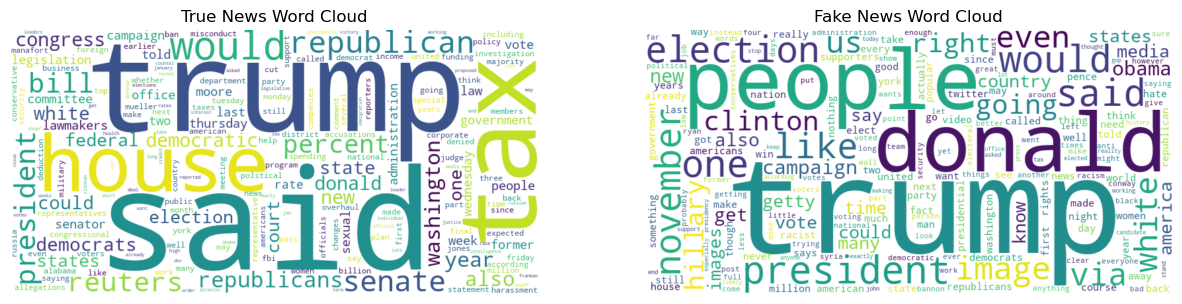

In [34]:
# Display the word clouds
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(true_wordcloud, interpolation='bilinear')
plt.title('True News Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Fake News Word Cloud')
plt.axis('off')

plt.show()

## 3. Sentiment Analysis: Asses the sentiment of the news articles to examine the emotional tone of the articles.


In [35]:
# Define a function to get the polarity of text
def sentiment_analysis_polarity(text):
    try:
        # Convert text to string
        text = str(text)
        # Create a TextBlob object
        blob = TextBlob(text)
        # Return only the polarity 
        return blob.sentiment.polarity
    except:
        return None

# Apply the function to the 'text' column and create a new 'polarity' column
news_df['polarity'] = news_df['text'].apply(sentiment_analysis_polarity)

# Check the first few entries in the new 'polarity' column
news_df['polarity'].head()



0    0.037083
1    0.055880
2    0.115930
3    0.035968
4    0.030093
Name: polarity, dtype: float64

In [36]:
# Define a function to get the subjectivity of text
def sentiment_analysis_subjectivity(text):
    try:
        # Convert text to string
        text = str(text)
        # Create a TextBlob object
        blob = TextBlob(text)
        # Return only the polarity 
        return blob.sentiment.subjectivity
    except:
        return None

# Apply the function to the 'text' column and create a new 'subjectivity' column
news_df['subjectivity'] = news_df['text'].apply(sentiment_analysis_subjectivity)

# Check the first few entries in the new 'subjectivity' column
news_df['subjectivity'].head()


0    0.410250
1    0.298557
2    0.316798
3    0.306569
4    0.399891
Name: subjectivity, dtype: float64

In [37]:
# Determine if the sentiment is positive, negative, or neutral

def determine_sentiment(polarity):
    if polarity > 0:
        return "positive"
    elif polarity < 0:
         return "negative"
    else:
        return "neutral"

# Apply the function to the 'text' column and create a new 'sentiment' column
news_df['sentiment'] = news_df['polarity'].apply(determine_sentiment)

# Check the first few entries in the new 'sentiment' column
news_df['sentiment'].head()


0    positive
1    positive
2    positive
3    positive
4    positive
Name: sentiment, dtype: object

In [38]:
# Check for unique values in the 'sentiment' column
unique_sentiments = news_df['sentiment'].unique()
print(f"Unique values in 'sentiment' column: {unique_sentiments}")


Unique values in 'sentiment' column: ['positive' 'negative' 'neutral']


In [39]:
# Check for null values in the 'sentiment' column
null_sentiments = news_df['sentiment'].isnull().sum()
print(f"Number of null values in 'sentiment' column: {null_sentiments}")


Number of null values in 'sentiment' column: 0


In [40]:
# Filter the DataFrame for true news and calculate the value counts of the 'sentiment' column
true_news_sentiment = news_df.loc[news_df['category'] == 1, 'sentiment'].value_counts()

# Display the value counts for both true and fake news
print("Sentiment distribution in True News:")
print(true_news_sentiment)


Sentiment distribution in True News:
positive    277
negative     43
neutral       9
Name: sentiment, dtype: int64


In [41]:
# Filter the DataFrame for fake news and calculate the value counts of the 'sentiment' column
fake_news_sentiment = news_df.loc[news_df['category'] == 0, 'sentiment'].value_counts()

print("Sentiment distribution in Fake News:")
print(fake_news_sentiment)


Sentiment distribution in Fake News:
positive    241
negative     60
Name: sentiment, dtype: int64


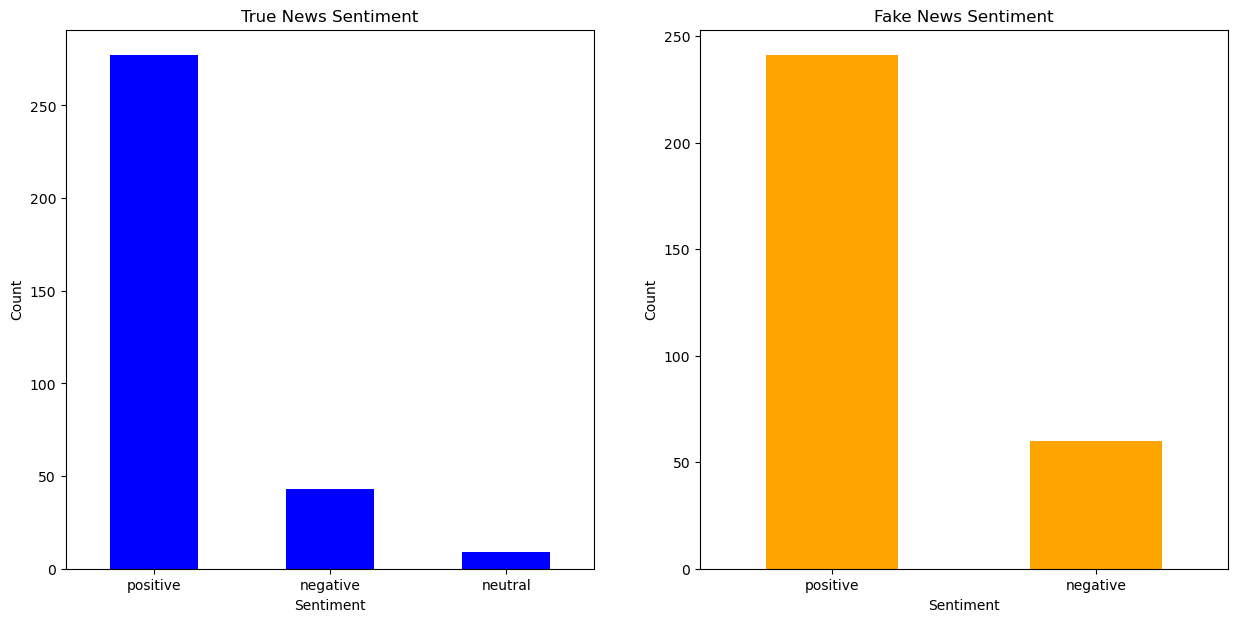

In [42]:
# Create a new figure for the bar charts
plt.figure(figsize=(15, 7))

# Create the True News Sentiment Bar Chart subplot
plt.subplot(1, 2, 1)  
true_news_sentiment.plot(kind='bar', color='blue')
plt.title('True News Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0) 

# Create the Fake News Sentiment Bar Chart subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
fake_news_sentiment.plot(kind='bar', color='orange')
plt.title('Fake News Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)  

# Display the bar charts
plt.show()



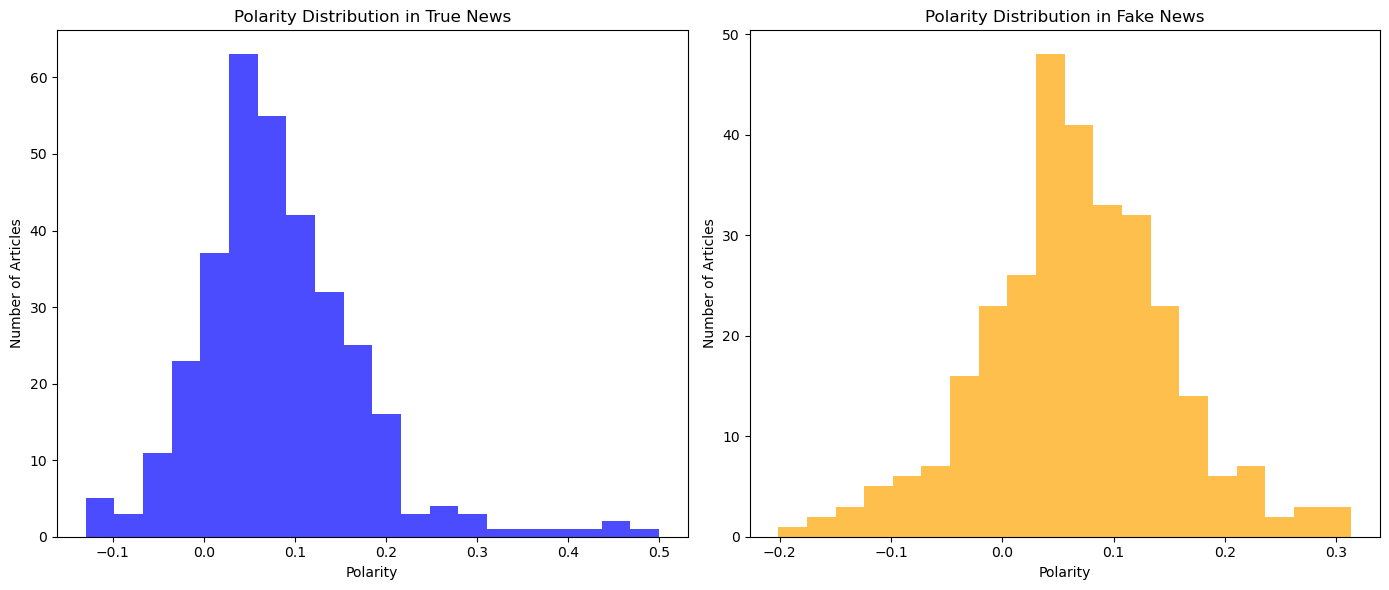

In [43]:
# Create histograms for polarity distribution of true and fake news
plt.figure(figsize=(14, 6))

# Histogram for true news polarity
plt.subplot(1, 2, 1)  
true_news_polarity = news_df.loc[news_df['category'] == 1, 'polarity']
plt.hist(true_news_polarity, bins=20, color='blue', alpha=0.7)
plt.title('Polarity Distribution in True News')
plt.xlabel('Polarity')
plt.ylabel('Number of Articles')

# Histogram for fake news polarity
plt.subplot(1, 2, 2) 
fake_news_polarity = news_df.loc[news_df['category'] == 0, 'polarity']
plt.hist(fake_news_polarity, bins=20, color='orange', alpha=0.7)
plt.title('Polarity Distribution in Fake News')
plt.xlabel('Polarity')
plt.ylabel('Number of Articles')

# Display the histograms
plt.tight_layout()
plt.show()

In [44]:
# Calculate the average polarity and subjectivity for true news
average_polarity_true = news_df.loc[news_df['category'] == 1, 'polarity'].mean()
average_subjectivity_true = news_df.loc[news_df['category'] == 1, 'subjectivity'].mean()

# Print the average polarity and subjectivity for true news
print(f"Average Polarity for True News: {average_polarity_true}")
print(f"Average Subjectivity for True News: {average_subjectivity_true}")


Average Polarity for True News: 0.08356363910231904
Average Subjectivity for True News: 0.39738927866504875


In [45]:
# Calculate the average polarity and subjectivity for fake news
average_polarity_fake = news_df.loc[news_df['category'] == 0, 'polarity'].mean()
average_subjectivity_fake = news_df.loc[news_df['category'] == 0, 'subjectivity'].mean()

# Print the average polarity and subjectivity for fake news
print(f"Average Polarity for Fake News: {average_polarity_fake}")
print(f"Average Subjectivity for Fake News: {average_subjectivity_fake}")


Average Polarity for Fake News: 0.0662087765958608
Average Subjectivity for Fake News: 0.48485964404191717


Most common words in fake news with negative sentiment:
[('trump', 383), ('people', 129), ('donald', 88), ('november', 83), ('president', 78), ('said', 78), ('like', 68), ('one', 68), ('election', 65), ('white', 62), ('would', 59), ('hillary', 58), ('obama', 52), ('image', 51), ('right', 50), ('going', 49), ('even', 47), ('via', 46), ('get', 44), ('know', 43), ('clinton', 41), ('us', 40), ('man', 40), ('campaign', 37), ('say', 35), ('time', 34), ('media', 31), ('republicans', 31), ('twitter', 30), ('supporters', 30)]


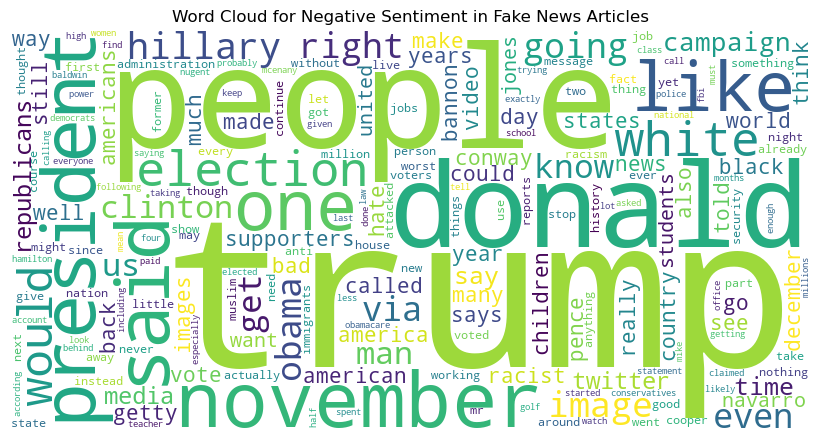

In [53]:
# Filter the DataFrame for fake news with negative sentiment to see if there are specific words that often appear in fake news
# with a negative sentiment?
negative_fake_news = news_df.loc[
                    (news_df['category'] == 0) & (news_df['sentiment'] == 'negative'), 'tokens']

# Flat the negative_fake_news into a single list
negative_fake_token_list = []

# Loop through each sublist in the true_news_tokens
for sublist in negative_fake_news:
    # Loop through each token in the current sublist
    for token in sublist:
        # Add the token to the flattened list
        negative_fake_token_list.append(token)
        
# Calculate the frequency distribution for negative and fake news:
negative_fake_freq_dist = FreqDist(negative_fake_token_list)
print("Most common words in fake news with negative sentiment:")
print(negative_fake_freq_dist.most_common(30)) 
     
# Visualization using a word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(negative_fake_freq_dist)

# Plotting the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.title('Word Cloud for Negative Sentiment in Fake News Articles')
plt.show()

In [48]:
# Generic function to generate word cloud for specific sentiment and category
def generate_wordcloud(sentiment, category, title):
    filtered_news = news_df.loc[
                    (news_df['category'] == category) & (news_df['sentiment'] == sentiment), 'tokens']
    
   
    # Flat the negative_fake_news into a single list
    flat_token_list = []

    # Loop through each sublist in the true_news_tokens
    for sublist in filtered_news:
        # Loop through each token in the current sublist
        for token in sublist:
            # Add the token to the flattened list
            flat_token_list.append(token)
        
    
    # Calculate the frequency distribution
    freq_dist = FreqDist(flat_token_list)
    print(f"Most common words in {'fake' if category == 0 else 'true'} news with {sentiment} sentiment:")
    print(freq_dist.most_common(30)) 
    
    # Visualization using a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
    
    # Plotting the WordCloud image                        
    plt.figure(figsize=(8, 8), facecolor=None) 
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0) 
    plt.title(title)
    plt.show()



Most common words in fake news with positive sentiment:
[('trump', 1564), ('donald', 359), ('people', 334), ('president', 312), ('would', 300), ('one', 281), ('said', 276), ('election', 268), ('like', 242), ('november', 242), ('image', 217), ('via', 213), ('us', 198), ('even', 197), ('white', 195), ('clinton', 193), ('new', 185), ('going', 184), ('campaign', 179), ('right', 169), ('also', 165), ('hillary', 163), ('obama', 157), ('vote', 157), ('could', 155), ('get', 148), ('country', 145), ('america', 141), ('getty', 141), ('images', 134)]


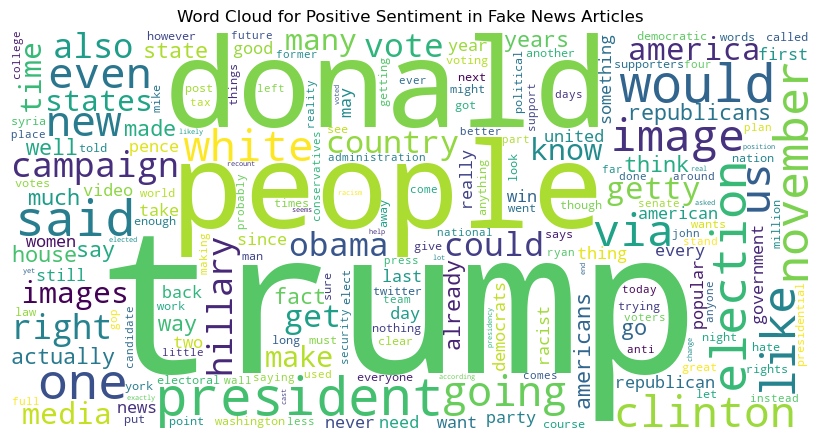

In [49]:
# Most common words in fake news with positive sentiment:
generate_wordcloud('positive', 0, 'Word Cloud for Positive Sentiment in Fake News Articles')


Most common words in true news with positive sentiment:
[('said', 1292), ('trump', 1014), ('tax', 765), ('would', 574), ('house', 568), ('republican', 495), ('senate', 463), ('president', 415), ('bill', 395), ('reuters', 381), ('percent', 366), ('republicans', 340), ('year', 306), ('washington', 285), ('also', 284), ('new', 249), ('democratic', 230), ('state', 226), ('congress', 222), ('donald', 217), ('could', 213), ('democrats', 206), ('white', 204), ('one', 201), ('moore', 185), ('federal', 181), ('states', 180), ('former', 174), ('election', 172), ('last', 172)]


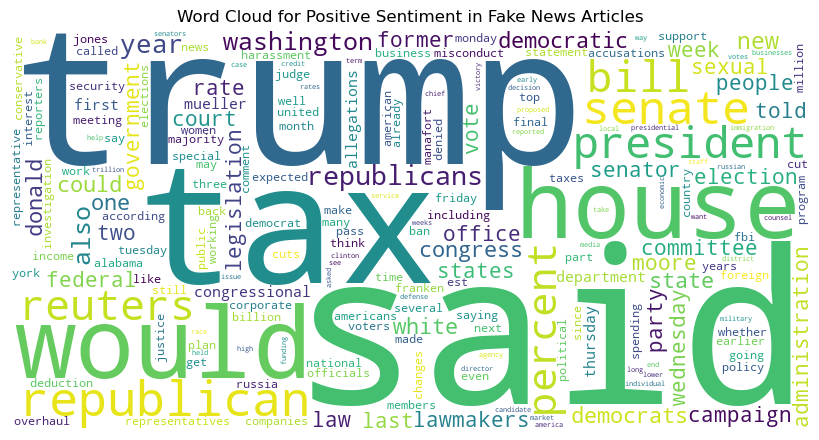

In [50]:
# Most common words in real news with positive sentiment:
generate_wordcloud('positive', 1, 'Word Cloud for Positive Sentiment in True News Articles')


Most common words in fake news with negative sentiment:
[('trump', 383), ('people', 129), ('donald', 88), ('november', 83), ('president', 78), ('said', 78), ('like', 68), ('one', 68), ('election', 65), ('white', 62), ('would', 59), ('hillary', 58), ('obama', 52), ('image', 51), ('right', 50), ('going', 49), ('even', 47), ('via', 46), ('get', 44), ('know', 43), ('clinton', 41), ('us', 40), ('man', 40), ('campaign', 37), ('say', 35), ('time', 34), ('media', 31), ('republicans', 31), ('twitter', 30), ('supporters', 30)]


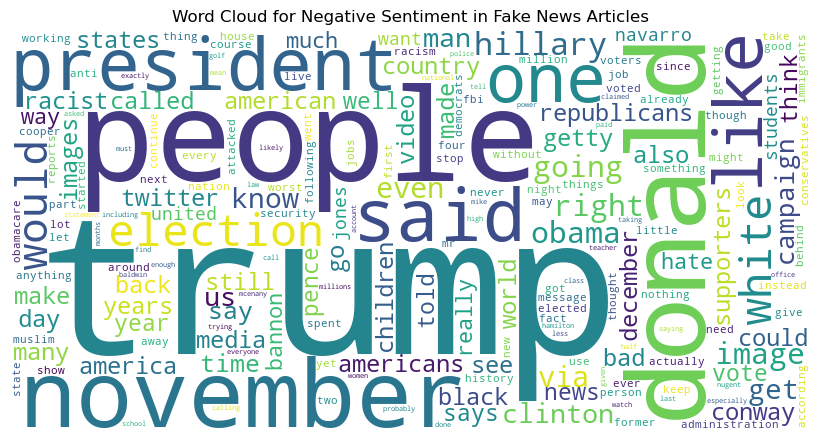

In [51]:
# Most common words in fake news with negative sentiment:
generate_wordcloud('negative', 0, 'Word Cloud for Negative Sentiment in Fake News Articles')


Most common words in true news with negative sentiment:
[('trump', 143), ('said', 112), ('house', 76), ('would', 57), ('president', 53), ('reuters', 49), ('washington', 47), ('republican', 46), ('government', 40), ('senate', 39), ('congress', 37), ('bill', 36), ('court', 33), ('russia', 30), ('democrats', 29), ('tax', 29), ('republicans', 28), ('donald', 28), ('also', 28), ('white', 27), ('federal', 27), ('legislation', 27), ('election', 26), ('administration', 26), ('democratic', 25), ('investigation', 24), ('flynn', 24), ('thursday', 23), ('could', 23), ('committee', 23)]


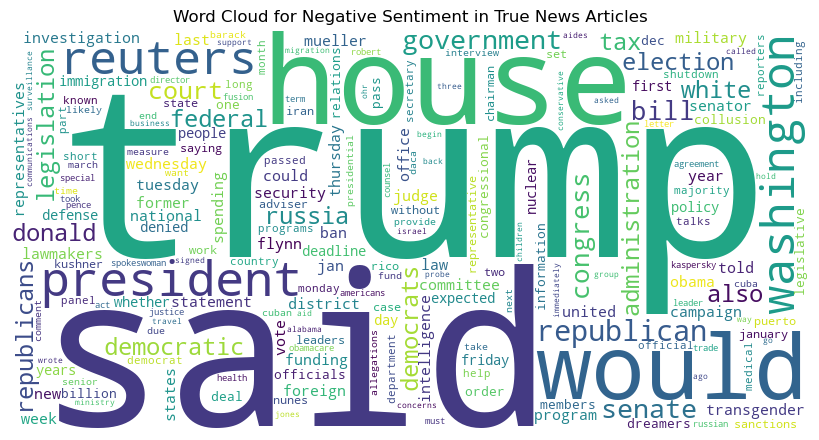

In [52]:
# Most common words in true news with negative sentiment:
generate_wordcloud('negative', 1, 'Word Cloud for Negative Sentiment in True News Articles')
